# Loading data

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('WC_AT.csv')

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


# Correlation

In [5]:
data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


In [6]:
import seaborn as sns

C:\Users\sumit\AppData\Local\Temp\ipykernel_9096\655577820.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Waist)


<Axes: xlabel='Waist', ylabel='Density'>

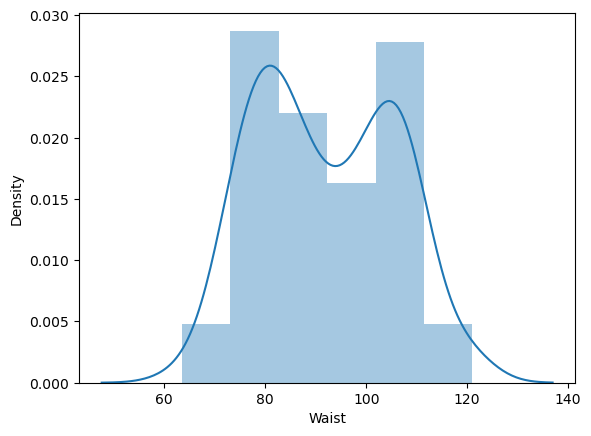

In [7]:
sns.distplot(data.Waist)

C:\Users\sumit\AppData\Local\Temp\ipykernel_9096\370485771.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.AT)


<Axes: xlabel='AT', ylabel='Density'>

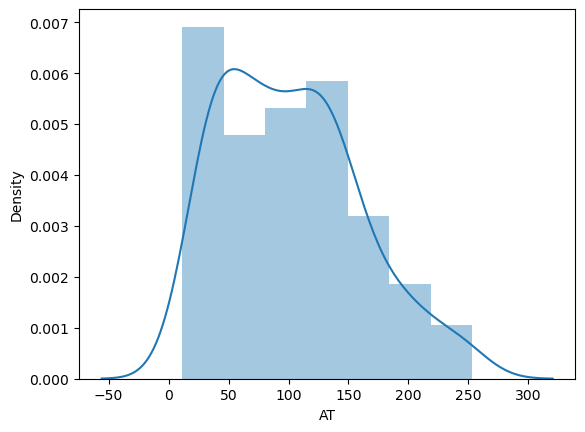

In [8]:
sns.distplot(data.AT)

In [10]:
import statsmodels.formula.api as smf

In [18]:
model = smf.ols('AT~Waist', data=data).fit()

<Axes: xlabel='Waist', ylabel='AT'>

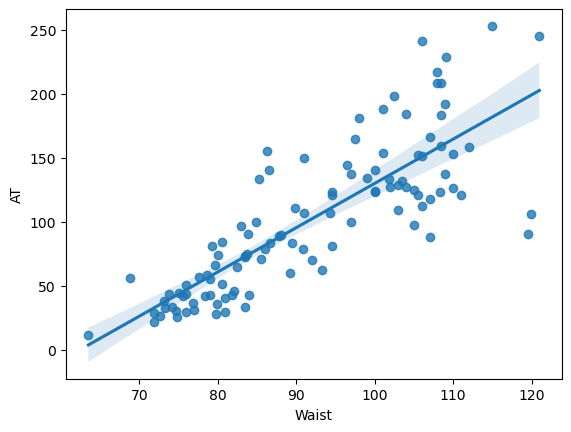

In [13]:
sns.regplot(x='Waist', y='AT', data=data)

# model parameters

In [14]:
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [16]:
model.tvalues, model.pvalues

(Intercept    -9.909103
 Waist        14.740376
 dtype: float64,
 Intercept    8.197416e-17
 Waist        1.618607e-27
 dtype: float64)

In [17]:
model.rsquared

np.float64(0.6700368930528429)

# Predict new data points

In [19]:
newdata = pd.Series([65,150,40])

In [25]:
datapred = pd.DataFrame(newdata, columns = ['Waist'])
datapred

,Waist
0,65
1,150
2,40


In [26]:
model.predict(datapred)

0      8.844373
1    302.847421
2    -77.627112
dtype: float64

here the 3rd customer `Waist` value we predict `AT` is -ve but it can't be negative.</br>
its wrong way.</br>
so check the minimum and maximum range to predict the AT value

In [27]:
data.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


So here __range__ of `Waist` is [63.500000, 121.000000]
</br>

To check for out of range value say customer to go to the normal procedure of CT scan and add those datapoint to our dataset so that our range will change to that range